## Quiz 2 - Probability, Statistics (ლექცია 4, ლექცია 5) - 7 ქულა

იხილეთ LoanStatus.csv მონაცემთა ფაილი, რომელშიც მოცემულია კლიენტთა ინფორმაცია შემდეგი სვეტებით:

Loan ID - კლიენტის ID

Gender - სქესი

Married - დაქორზინებული არის თუ არა

Dependents - ოჯახის წევრების რაოდენობა, რომლის ფინანსურ მხარდაჭერასაც უზრუნველყოფს კლიენტი

Education - არის თუ არა უმაღლესი განათლების მქონე

Self_Employed - არის თუ არა თვითდასაქმებული

ApplicantIncome - კლიენტის შემოსავალი (per month)

LoanAmount  - სესხის რაოდენობა (ათასებში)

Loan_Amount_Term - სესხის ვადა

Credit_History - როგორი საკრედიტო ისტორია აქვს კლიენტს (1-კარგი, 0-ცუდი)

Property_Area - საცხოვრებელი და სამუშაო ადგილი

Loan_Status - სესხის გაცემის სტატუსი


## დავალება 1: აღწერილობითი სტატისტიკა  (1 ქულა)
ა) გახსენით ფაილი და დაბეჭდეთ აღწერილობითი სტატისტიკის მონაცემები თქვენთვის საინტერესო ველებისთვის, როგორიცაა საშუალო, მედიანა, მოდა, სტდ. გადახრა, ა.შ. (მოახდინეთ სიტყვიერი ინტერპრეტაცია);

ბ) დაითვალეთ თითოეულ სვეტში ცარიელი მნიშვნელობების რაოდენობა შესაბამისი ფუნქციით

In [1]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('LoanStatus.csv')

# print mean,median,moda ect of ApplicantIncome
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [3]:
df.isna().sum()

Loan_ID              0
Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
ApplicantIncome      0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64

## დავალება 2:  ალბათობა (1 ქულა)
ა) დაითვალეთ, რა არის სესხის აღების ალბათობა Loan_Status-ის მიხედვით.

ბ) რა არის სესხის აღების ალბათობა, მაშინ როცა კლიენტს კარგი საკრედიტო ისტორია აქვს.

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [4]:
# calculate approved loans
count_loan_status = df['Loan_Status'].value_counts(dropna=False)

# divide approved loan status count by total amount of loans 
probability_of_approving = count_loan_status.get('Y')/ len(df)

print(f'The probability that loan can be approved is: {probability_of_approving}')

The probability that loan can be approved is: 0.6872964169381107


In [5]:
# calculate approved loans
approved_loans = df[df['Loan_Status'] == 'Y']

# calculate credit history for approved loans only
approved_good_history = approved_loans[approved_loans['Credit_History'] == 1]

# divide approved loans with good history by total amount of approved loans to calculate the probability of approving a loan f0r users with good credit history
probability_approved_good_credit = len(approved_good_history) / len(approved_loans)

print("Probability of approving a loan for users with good credit history:", probability_approved_good_credit)

Probability of approving a loan for users with good credit history: 0.8957345971563981


## დავალება 3: გრაფიკული წარმოდგენა (1 ქულა)
ა) seaborn.distplot ან seaborn.histplot() ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი გრაფიკი. ლინკი: https://seaborn.pydata.org/generated/seaborn.distplot.html

ბ) matplotlib.pyplot.hist ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი ჰისტოგრამი, რომელშიც bin-ების (ჰოსტოგრამაში ბლოკების) რაოდენობას თქვენ განსაზღვრავთ (მაგ. ჰისტოგრამაში 10 სვეტად წარმოადგინოთ მონაცემები.) იხ. დოკუმენტაცია შემდეგ ლინკზე: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

Future warnings-ების გამოსართავად ჩაწერეთ შემდეგი ბრძანებები:
import warnings
warnings.filterwarnings("ignore")

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

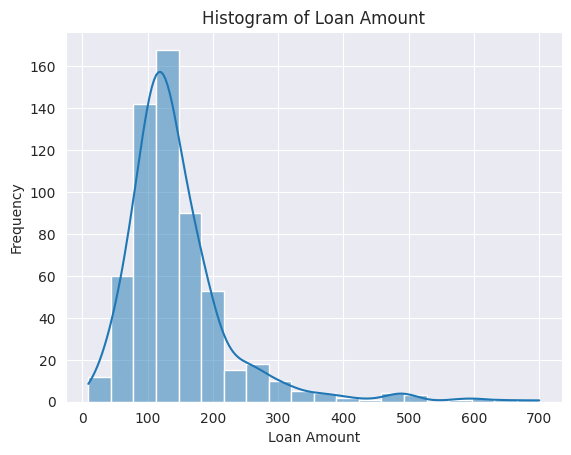

In [7]:
numerical_columns = 'LoanAmount'
grid = sns.histplot(data=df[numerical_columns].dropna(), bins=20, kde=True)

plt.title('Histogram of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

plt.show()

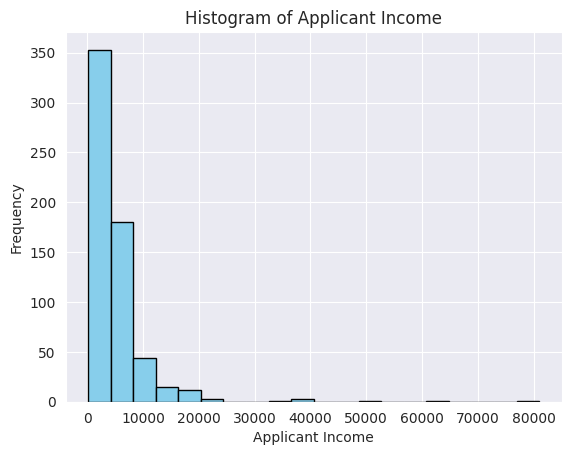

In [8]:
import matplotlib.pyplot as plt

plt.hist(df['ApplicantIncome'], bins=20, color='skyblue', edgecolor='black')

plt.title('Histogram of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')

plt.show()


## დავალება 4:  კუმულაციური ალბათობა (Cumulative distribution function) - (1 ქულა)
დაითვალეთ შემდეგი კუმულაციური ალბათობა scipy.stats.norm.cdf() ფუნქციის გამოყენებით.
დაითვალეთ კლიენტების რამდენ პროცენტს აქვს შემოსავალი 2000 ევროზე ნაკლები ყოველთვიურად.
norm.cdf(x, mean_val, std_dev_val) ფუნქციის პირველი პარამეტრია სასაზღვრო მნიშვნელობა, მეორე- საშუალო, მესამე -სტდ. გადახრა.

#### მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია

In [9]:
from scipy.stats import norm

In [10]:
col_name = 'ApplicantIncome'
mean_income = df[col_name].mean()
std_income = df[col_name].std()

cdf = norm.cdf(2000, loc=mean_income, scale=std_income)
cdf_perc = round(cdf*100,2)

print(f"{cdf_perc}% of applicants have income less than 2000")

28.87% of applicants have income less than 2000


## დავალება 5: სტატისტიკა (1 ქულა)

ააგეთ 2 boxplot დიაგრამა seaborn.boxplot() ფუნქციის გამოყენებით რომელიმე ველის მიმართ.

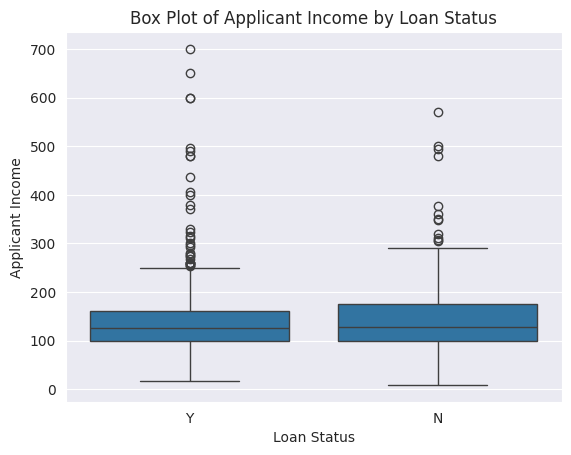

In [11]:
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)

plt.title('Box Plot of Applicant Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')

plt.show()

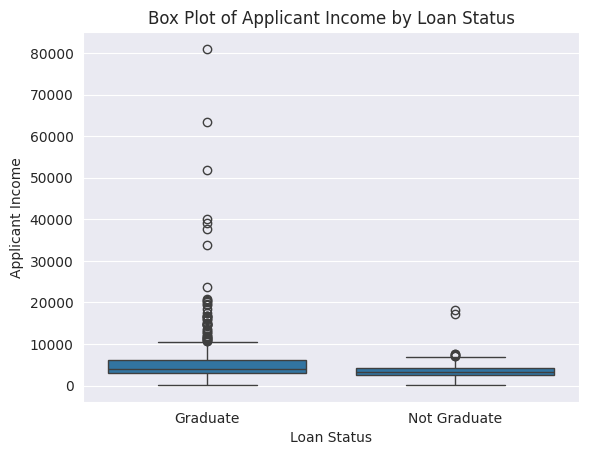

In [12]:
sns.boxplot(x='Education', y='ApplicantIncome', data=df)

plt.title('Box Plot of Applicant Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')

plt.show()

## დავალება 6: t-test (2 ქულა)
ა) გააკეთეთ t-test ანალიზი (One sample t-test)  რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_1samp ფუნქცია.

ბ) გააკეთეთ t-test ანალიზი (Two sample t-test) რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_ind ფუნქცია.

განსაზღვრეთ ნულოვანი და ალტერნატიული ჰიპოთეზა, გამოიყენეთ აღნიშნული ფუნქციები და მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია.

In [13]:
from scipy.stats import ttest_1samp, ttest_ind

In [14]:
column_name = 'ApplicantIncome'

null_mean = 150  

t_statistic, p_value = ttest_1samp(df[column_name], null_mean)

print("T-statistic: ", t_statistic)
print("P-value: ", p_value)

alpha = 0.05
if p_value < alpha:
    print("the mean of", column_name, "is significantly different from", null_mean)
else:
    print("the mean of", column_name, "is not significantly different from", null_mean)


T-statistic:  21.308676123682023
P-value:  8.11742839977913e-76
the mean of ApplicantIncome is significantly different from 150


In [15]:
group1 = df[df['Loan_Status'] == 'Y']['ApplicantIncome']
group2 = df[df['Loan_Status'] == 'N']['ApplicantIncome']

t_statistic, p_value = ttest_ind(group1, group2)

print("T-statistic: ", t_statistic)
print("P-value: ", p_value)


alpha = 0.05  
if p_value < alpha:
    print("there is a significant difference between the means of the two groups")
else:
    print("there is no significant difference between the means of the two groups")

T-statistic:  -0.11650844828724542
P-value:  0.907287812130518
there is no significant difference between the means of the two groups
